In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import string
%matplotlib inline

In [5]:
import nltk

In [6]:
dataset = pd.read_csv('Symptom2Disease.csv')

In [7]:
dataset.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [8]:
messages=[line.rstrip() for line in dataset['text']]

In [9]:
print(len(messages))

1200


In [10]:
messages[50]

'I have a rash on my legs that is causing a lot of discomforts. It seems there is a cramp and I can see prominent veins on the calf. Also, I have been feeling very tired and fatigued in the past couple of days.'

In [11]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.


1 My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation.


2 I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints.


3 There is a silver like dusting on my skin, especially on my lower back and scalp. This dusting is made up of small scales that flake off easily when I scratch them.


4 My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms.


5 The skin on my palms and soles is thickened and has deep cracks. These cracks are painful and bleed easily.


6 The skin around my mouth, nose, and eyes is red and inflamed. It is often itchy and uncomfortable. There is a noticeable inflammat

In [12]:
messages=pd.DataFrame(dataset,columns=['text','label'])

In [13]:
messages.head()

,text,label
0,I have been experiencing a skin rash on my arm...,Psoriasis
1,"My skin has been peeling, especially on my kne...",Psoriasis
2,I have been experiencing joint pain in my fing...,Psoriasis
3,"There is a silver like dusting on my skin, esp...",Psoriasis
4,"My nails have small dents or pits in them, and...",Psoriasis


In [14]:
messages.describe()

,text,label
count,1200,1200
unique,1153,24
top,"I've been feeling extremely scratchy, sick, an...",Psoriasis
freq,4,50


In [15]:
messages.groupby('label').describe()

text         \
                                count unique   
label                                          
Acne                               50     46   
Arthritis                          50     46   
Bronchial Asthma                   50     49   
Cervical spondylosis               50     49   
Chicken pox                        50     49   
Common Cold                        50     49   
Dengue                             50     50   
Dimorphic Hemorrhoids              50     41   
Fungal infection                   50     50   
Hypertension                       50     50   
Impetigo                           50     50   
Jaundice                           50     38   
Malaria                            50     44   
Migraine                           50     47   
Pneumonia                          50     47   
Psoriasis                          50     50   
Typhoid                            50     50   
Varicose Veins                     50     50   
allergy                            50     50   
diabetes                           50     50   
drug reaction                      50     50   
gastroesophageal reflux disease    50     48   
peptic ulcer disease               50     50   
urinary tract infection            50     50   

                                                                                    \
                                                                               top   
label                                                                                
Acne                             A nasty rash has just appeared on my skin. Bla...   
Arthritis                        I've been feeling really weak in my muscles an...   
Bronchial Asthma                 I've been struggling with fatigue and a consta...   
Cervical spondylosis             Back pain, a persistent cough, and numbness in...   
Chicken pox                      I'm feeling fatigued and have no energy. I can...   
Common Cold                      I've been quite exhausted and ill. My throat h...   
Dengue                           I am facing severe joint pain and vomitting. I...   
Dimorphic Hemorrhoids            I've been constipated and it's really hard to ...   
Fungal infection                 I have raised lumps, a rash that looks red and...   
Hypertension                     I have been experiencing a headache, chest pai...   
Impetigo                         I have developed a skin rash on my face and ne...   
Jaundice                         I've been feeling extremely scratchy, sick, an...   
Malaria                          I have a high fever, severe itching, chills, a...   
Migraine                         Along with excessive appetite, a stiff neck, h...   
Pneumonia                        I'm having a hard time breathing and I feel re...   
Psoriasis                        I have been experiencing a skin rash on my arm...   
Typhoid                          I have constipation and belly pain, and it's b...   
Varicose Veins                   I have a rash on my legs that is causing a lot...   
allergy                          I have a runny nose and I am sneezing all the ...   
diabetes                         I have increased thirst and frequent urination...   
drug reaction                    I have a metallic taste in my mouth, and also ...   
gastroesophageal reflux disease  I'm not in the mood to eat, and swallowing is ...   
peptic ulcer disease             I have a burning sensation in my upper abdomen...   
urinary tract infection          Frequent urges to urinate with little output, ...   

                                      
                                freq  
label                                 
Acne                               2  
Arthritis                          3  
Bronchial Asthma                   2  
Cervical spondylosis               2  
Chicken pox                        2  
Common Cold                        2  
Dengue                             1  
Dimorphic Hemorrhoids  

In [16]:
messages['length']=messages['text'].apply(len)

In [17]:
messages.head()

,text,label,length
0,I have been experiencing a skin rash on my arm...,Psoriasis,141
1,"My skin has been peeling, especially on my kne...",Psoriasis,138
2,I have been experiencing joint pain in my fing...,Psoriasis,148
3,"There is a silver like dusting on my skin, esp...",Psoriasis,164
4,"My nails have small dents or pits in them, and...",Psoriasis,140


<AxesSubplot:ylabel='Frequency'>

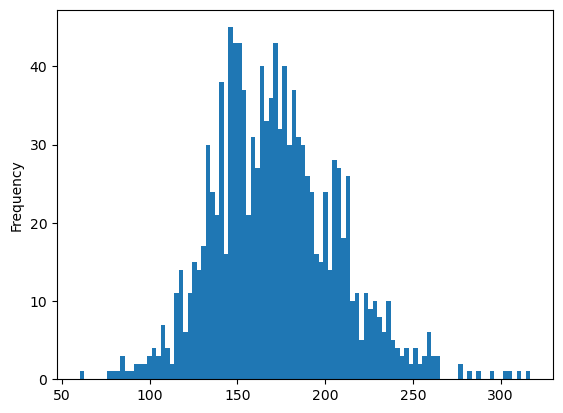

In [18]:
messages['length'].plot.hist(bins=100)

In [19]:
messages['length'].describe()

count    1200.000000
mean      171.876667
std        35.481506
min        60.000000
25%       147.750000
50%       170.000000
75%       193.000000
max       317.000000
Name: length, dtype: float64

In [20]:
messages[messages['length']==138]['text'].iloc[0]

'My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation.'

array([[<AxesSubplot:title={'center':'Acne'}>,
        <AxesSubplot:title={'center':'Arthritis'}>,
        <AxesSubplot:title={'center':'Bronchial Asthma'}>,
        <AxesSubplot:title={'center':'Cervical spondylosis'}>,
        <AxesSubplot:title={'center':'Chicken pox'}>],
       [<AxesSubplot:title={'center':'Common Cold'}>,
        <AxesSubplot:title={'center':'Dengue'}>,
        <AxesSubplot:title={'center':'Dimorphic Hemorrhoids'}>,
        <AxesSubplot:title={'center':'Fungal infection'}>,
        <AxesSubplot:title={'center':'Hypertension'}>],
       [<AxesSubplot:title={'center':'Impetigo'}>,
        <AxesSubplot:title={'center':'Jaundice'}>,
        <AxesSubplot:title={'center':'Malaria'}>,
        <AxesSubplot:title={'center':'Migraine'}>,
        <AxesSubplot:title={'center':'Pneumonia'}>],
       [<AxesSubplot:title={'center':'Psoriasis'}>,
        <AxesSubplot:title={'center':'Typhoid'}>,
        <AxesSubplot:title={'center':'Varicose Veins'}>,
        <AxesSubplot:title=

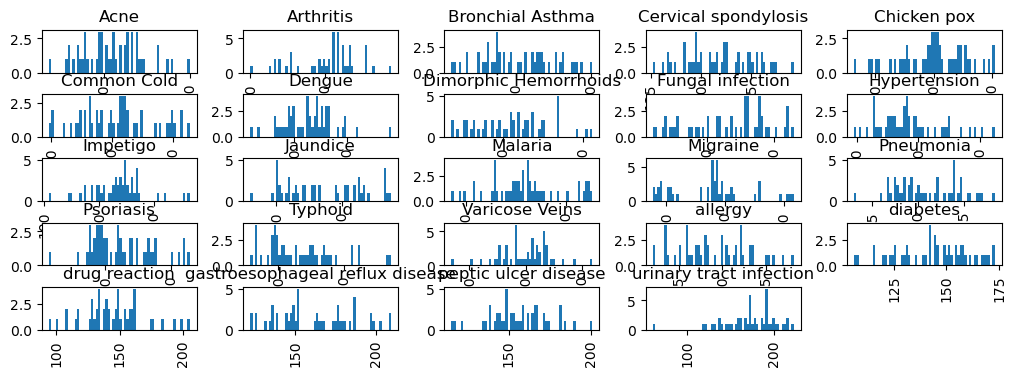

In [21]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [22]:
from nltk.corpus import stopwords

In [23]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [24]:
messages['text'].head(5).apply(text_process)

0    [experiencing, skin, rash, arms, legs, torso, ...
1    [skin, peeling, especially, knees, elbows, sca...
2    [experiencing, joint, pain, fingers, wrists, k...
3    [silver, like, dusting, skin, especially, lowe...
4    [nails, small, dents, pits, often, feel, infla...
Name: text, dtype: object

In [25]:
messages.head()

,text,label,length
0,I have been experiencing a skin rash on my arm...,Psoriasis,141
1,"My skin has been peeling, especially on my kne...",Psoriasis,138
2,I have been experiencing joint pain in my fing...,Psoriasis,148
3,"There is a silver like dusting on my skin, esp...",Psoriasis,164
4,"My nails have small dents or pits in them, and...",Psoriasis,140


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

1548


In [28]:
message4 = messages['text']
print(message4)

0       I have been experiencing a skin rash on my arm...
1       My skin has been peeling, especially on my kne...
2       I have been experiencing joint pain in my fing...
3       There is a silver like dusting on my skin, esp...
4       My nails have small dents or pits in them, and...
                              ...                        
1195    I'm shaking and trembling all over. I've lost ...
1196    Particularly in the crevices of my skin, I hav...
1197    I regularly experience these intense urges and...
1198    I have trouble breathing, especially outside. ...
1199    I constantly sneeze and have a dry cough. My i...
Name: text, Length: 1200, dtype: object


In [29]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 1)	2
  (0, 2)	3
  (0, 3)	10
  (0, 4)	1
  (0, 5)	3
  (0, 6)	1
  (0, 7)	4
  (0, 10)	1
  (0, 12)	7
  (0, 13)	10
  (0, 16)	1
  (0, 19)	1
  (0, 20)	1
  (0, 22)	1
  (0, 25)	4
  (0, 28)	5
  (0, 29)	3
  (0, 30)	2
  (0, 32)	1
  (0, 33)	1
  (0, 36)	5
  (0, 40)	1
  (0, 41)	1
  (0, 46)	1
  (0, 49)	1
  :	:
  (0, 1518)	5
  (0, 1519)	2
  (0, 1520)	28
  (0, 1521)	2
  (0, 1522)	11
  (0, 1524)	4
  (0, 1525)	2
  (0, 1526)	5
  (0, 1527)	2
  (0, 1528)	1
  (0, 1529)	37
  (0, 1530)	21
  (0, 1531)	1
  (0, 1532)	3
  (0, 1533)	3
  (0, 1534)	27
  (0, 1535)	1
  (0, 1536)	1
  (0, 1537)	4
  (0, 1538)	4
  (0, 1540)	4
  (0, 1541)	5
  (0, 1542)	32
  (0, 1546)	1
  (0, 1547)	1
(1, 1548)


In [30]:
print(bow_transformer.get_feature_names()[2])
print(bow_transformer.get_feature_names()[101])

Additionally
accompanying


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
messages_bow = bow_transformer.transform(messages['text'])

In [32]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (1200, 1548)
Amount of Non-Zero occurences:  18515


In [33]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 1


In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 1547)	0.002336729095244863
  (0, 1546)	0.002336729095244863
  (0, 1542)	0.039433225185650886
  (0, 1541)	0.009948553784503829
  (0, 1540)	0.007595362823409709
  (0, 1538)	0.007958843027603062
  (0, 1537)	0.008189202452253776
  (0, 1536)	0.002336729095244863
  (0, 1535)	0.0022086549515969835
  (0, 1534)	0.03616726428743216
  (0, 1533)	0.005969132270702298
  (0, 1532)	0.006353354701645935
  (0, 1531)	0.002336729095244863
  (0, 1530)	0.031565747596157885
  (0, 1529)	0.052358467565850116
  (0, 1528)	0.002336729095244863
  (0, 1527)	0.00423556980109729
  (0, 1526)	0.008727417479153902
  (0, 1525)	0.004417309903193967
  (0, 1524)	0.007595362823409709
  (0, 1522)	0.01947843218425003
  (0, 1521)	0.00423556980109729
  (0, 1520)	0.041777303487173637
  (0, 1519)	0.004417309903193967
  (0, 1518)	0.009948553784503829
  :	:
  (0, 49)	0.002336729095244863
  (0, 46)	0.002336729095244863
  (0, 41)	0.0022086549515969835
  (0, 40)	0.002117784900548645
  (0, 36)	0.009948553784503829
  (0, 33)	0.0023

In [35]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1200, 1548)


In [36]:
from sklearn.naive_bayes import MultinomialNB
stress_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [37]:
all_predictions = stress_detect_model.predict(messages_tfidf)

In [38]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        50
                      Arthritis       1.00      1.00      1.00        50
               Bronchial Asthma       1.00      1.00      1.00        50
           Cervical spondylosis       1.00      1.00      1.00        50
                    Chicken pox       0.98      1.00      0.99        50
                    Common Cold       1.00      1.00      1.00        50
                         Dengue       1.00      0.98      0.99        50
          Dimorphic Hemorrhoids       1.00      1.00      1.00        50
               Fungal infection       1.00      1.00      1.00        50
                   Hypertension       1.00      1.00      1.00        50
                       Impetigo       1.00      1.00      1.00        50
                       Jaundice       1.00      1.00      1.00        50
                        Malaria       1.00      1.

In [39]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['text'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

960 240 1200


In [40]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [41]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002F7CEE8E670>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [42]:
predictions = pipeline.predict(msg_test)

In [43]:
print(classification_report(predictions,label_test))

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         9
                      Arthritis       1.00      1.00      1.00         8
               Bronchial Asthma       1.00      1.00      1.00         7
           Cervical spondylosis       1.00      0.92      0.96        13
                    Chicken pox       0.92      1.00      0.96        11
                    Common Cold       1.00      0.92      0.96        13
                         Dengue       0.91      1.00      0.95        10
          Dimorphic Hemorrhoids       1.00      1.00      1.00         8
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       0.92      1.00      0.96        11
                       Impetigo       1.00      1.00      1.00        13
                       Jaundice       1.00      1.00      1.00         5
                        Malaria       1.00      1.